# Importing libraries

In [1]:
from imblearn.over_sampling import  SMOTE
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, ParameterGrid, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn import metrics


plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [2]:
df = pd.read_csv("creditcard.csv")

# Initial Analysis

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**No Impuation needed as no missing values**
 

# Exploratory Data Analysis

## Correlation

<AxesSubplot:>

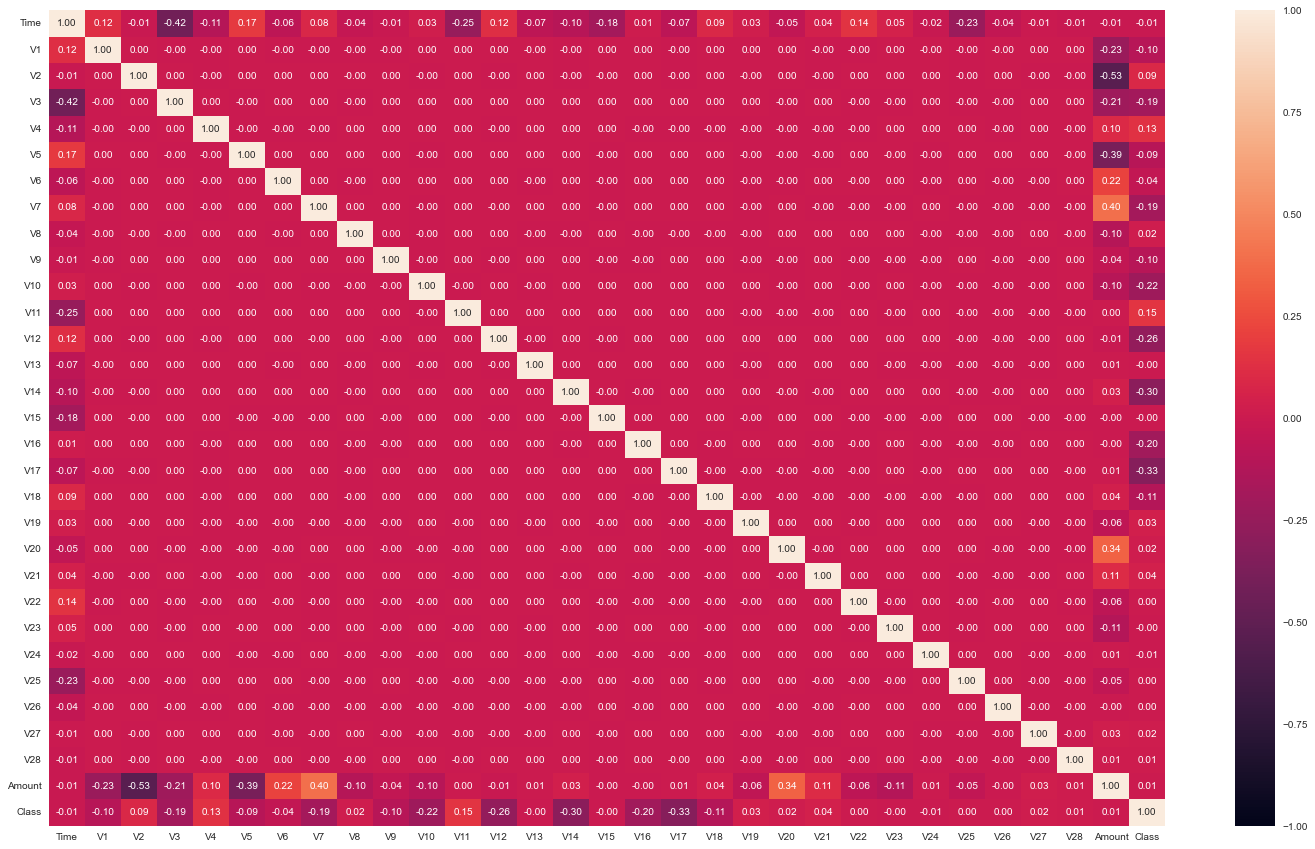

In [6]:
# Creating a correlation map
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           annot=True,
           fmt='.2f')


### Distribution of casses and checking for class imbalance

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class distribution is heavily skewed in favour of class 0

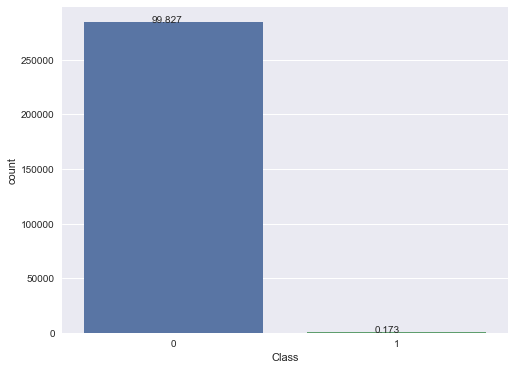

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8, 6))
ax = sns.countplot(df.Class)
for p in ax.patches:
        ax.annotate('{}'.format(round((p.get_height()/len(df.Class))*100, 3)), (p.get_x()+0.3, p.get_height()+100))

## Time vs Amount

In [9]:
df['TimeMin'] = df['Time'] / 60
df['TimeHour'] = df['Time'] / 60**2

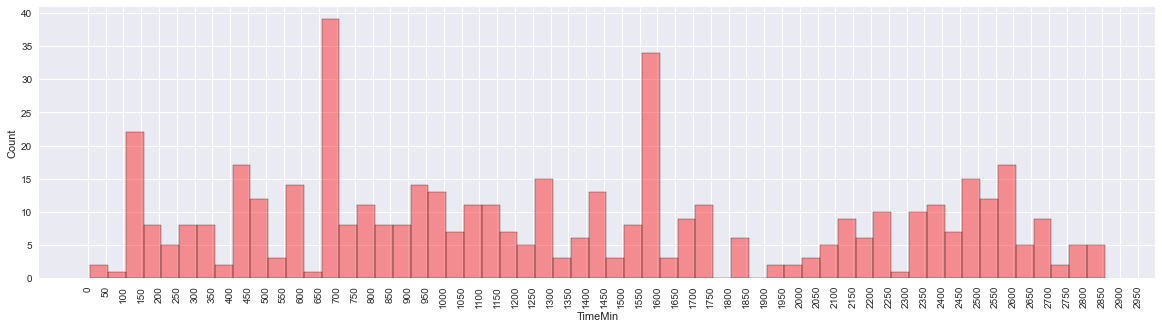

In [10]:
plt.figure(figsize=(20, 5))
sns.histplot(df[df.Class==1].TimeMin, binwidth=50,color='red',alpha=0.4)
plt.xticks(range(0, 3000, 50), range(0, 3000, 50), rotation=90);

**There seems to be no particular relationshp between time and fraudulent transactions**

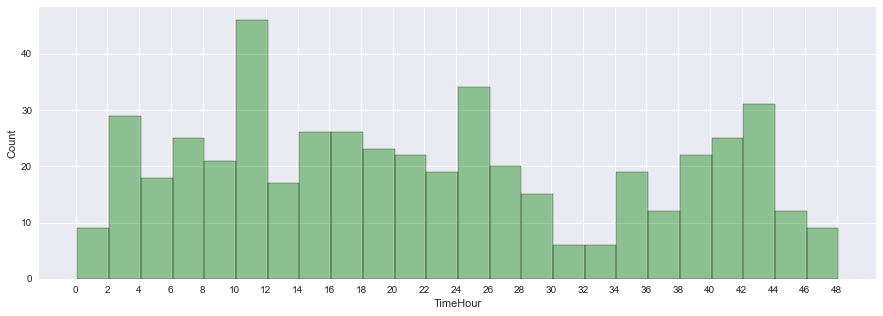

In [11]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df.Class==1].TimeHour, binwidth=2,color='green',alpha=0.4)
plt.xticks(range(0, 50, 2), range(0, 50, 2))
plt.show(block=False)

## Amount

In [12]:
df[df.Class==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

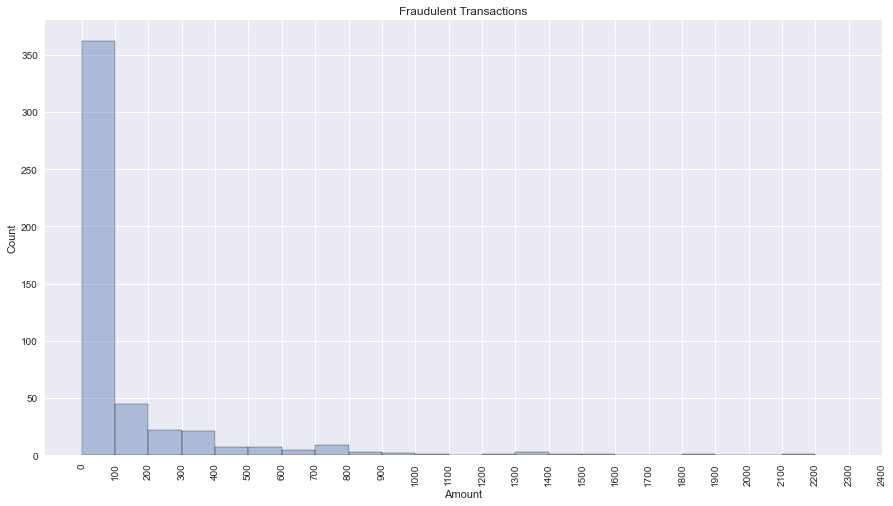

In [13]:
plt.figure(figsize=(15, 8))
plt.title("Fraudulent Transactions")
sns.histplot(df[df.Class==1].Amount, binwidth=100,alpha=0.4)
plt.xticks(range(0, 2500, 100), range(0, 2500, 100), rotation=90)
plt.show()

**Most of the fradulent transactions are in the range of 0-100 dollars**

## Amount vs Class

<AxesSubplot:xlabel='Class', ylabel='Amount'>

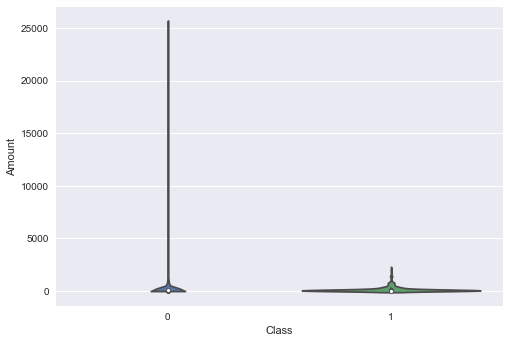

In [14]:
sns.violinplot(df.Class, df.Amount)

**transactions for the cases are in lower amouts only, most fraudulent transactions are of lower amounts and and has a very high maxima**

## Time vs Class

<AxesSubplot:xlabel='Class', ylabel='Time'>

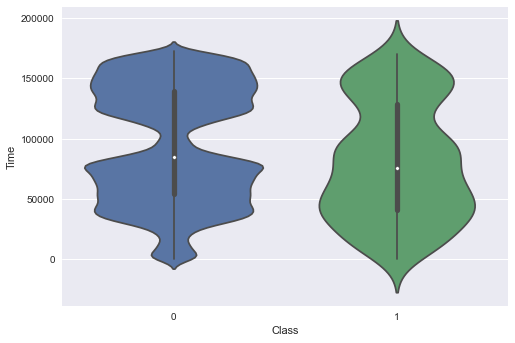

In [15]:
sns.violinplot(df.Class,df.Time)

**As confirmed above too there is no clear relation relationship between time and fraud transactions. So it may be better toi remove time variable**

In [16]:
df.drop(['Time', 'TimeMin', 'TimeHour'], axis=1, inplace=True)

# Train test split

In [17]:
# Train test split
y = df["Class"]
X = df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# Checking for variable distribution

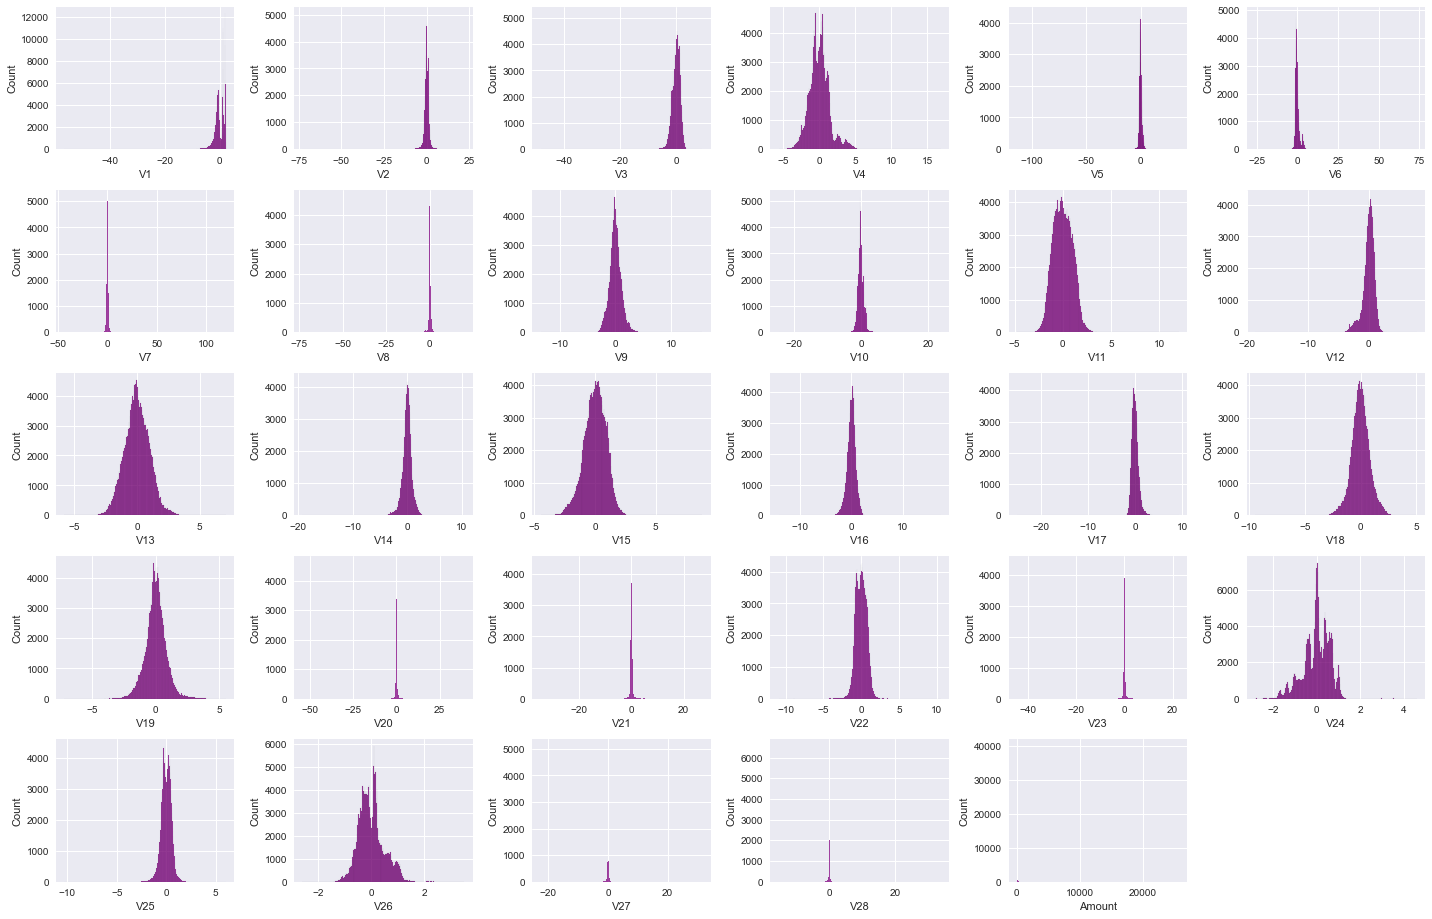

In [18]:
# plot the histogram of a variable from the dataset
plt.figure(figsize=(20, 15))
for i in range(1, 30):
    plt.subplot(6, 6, i)
    sns.histplot(X_train.iloc[:, i-1],color='purple')
plt.tight_layout()
plt.show(block=False)

## Scaling The data

In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
# creating a results dataframe for later to evaluate the models
results = pd.DataFrame(columns = ['model_name', 'threshold', 'recall', 'roc_auc_score'])

# Model Evaluation Function

In [21]:
def model_evaluation(y_pred_proba_test):
#     Report for different thresholds
    thresholds = [i * 0.1 for i in range(0, 10)]
    print("----------------------------Results----------------------------")
#     best ROC score initialisation
    best_roc_score = 0

#     Iterating through every threshold from 0.1 to 0.9
    for threshold in thresholds:
        y_pred = np.where(y_pred_proba_test[:, 1] > threshold, 1, 0)
#   Calculating different metrics
        accuracy = str(round(metrics.accuracy_score(y_test, y_pred), 3))
        precision = str(round(metrics.precision_score(y_test, y_pred), 3))
        recall = str(round(metrics.recall_score(y_test, y_pred), 3))
        roc_auc = str(round(metrics.roc_auc_score(y_test, y_pred), 3))
#   Setting the best roc score, threshold, recall scores.
        if float(roc_auc) > best_roc_score:
            best_roc_score = float(roc_auc)
            best_threshold = threshold
            best_recall_score = recall
#   printing the results for every threshold 
        print("----------for Test with threshold", round(threshold, 2), "----------")
        print("accuracy\tprecision\trecall\t\troc_auc")
        print("\t\t".join([accuracy, precision, recall, roc_auc]))
        print("\n")
#   Confusion Matrix
        print("\t\tCONFUSION MATRIX")
        confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), 
                                        columns=['Predicted Negative', 'Predicted Positive'],
                                        index=['Actual Negative', 'Actual Positive'])
        print(confusion_matrix)
        print("\n")
    print("BEST ROC AUC SCORE is ", best_roc_score, "at the threshold", best_threshold)
    return best_roc_score, best_threshold, best_recall_score

# Draw ROC

In [22]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression

In [23]:
# Initial model
logit = LogisticRegression()
# Folds for crossvalidation
cv = KFold(3)
# Setting paramters
param_grid={
    'solver':['saga', 'lbfgs']
}
# Grid search for running model with every possible combimnation
# that is defined with above param_grid
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

# Taking the best estimator and fitting data
best_logit = grid.best_estimator_
best_logit.fit(X_train, y_train)

# Taking probabilities for model evaluation with different thresholds
y_pred_proba_test = best_logit.predict_proba(X_test)
# Model Evaluation
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION IMB', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
BEST GRID SCORE 0.98275898052777
BEST GRID PARAMS
{'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               56864
Actual Positive                   0                  98


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.732		0.837		0.918


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               56834                  30
Actual Positive                  16                  82


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.745		0.806		0.903


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative     

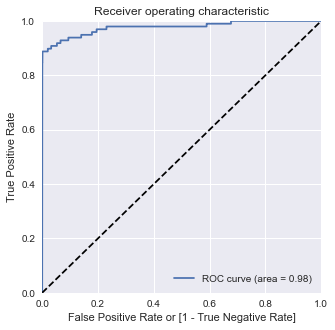

In [24]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Random Forest

In [25]:
rf = RandomForestClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'n_estimators':[200],
    'max_depth':[10],
    'min_samples_leaf':[50, 100],
    'min_samples_split':[25, 50]
}

grid = GridSearchCV(rf,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=cv,
                    verbose=1,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_proba_test = best_rf.predict_proba(X_test)
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['RANDOM FOREST', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.97576401725095
BEST GRID PARAMS
{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 200}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               56864
Actual Positive                   0                  98


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.998		0.459		0.867		0.933


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               56764                 100
Actual Positive                  13                  85


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.675		0.847		0.923


		CONFUSION MATRIX
     

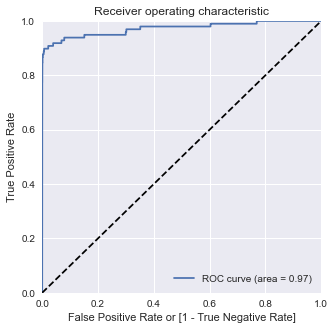

In [26]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Handling Class Imbalance Using SMOTE

In [27]:
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [28]:
y_smote.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

## Logistic Regression with Balanced Dataset

In [29]:
logit = LogisticRegression()
cv = KFold(3)
param_grid={
    'solver':['saga', 'lbfgs'],
    'C':[0.01, 10]
}
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_logit = grid.best_estimator_
best_logit.fit(X_smote, y_smote)

y_pred_proba_test = best_logit.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION SMOTE', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9827543358845646
BEST GRID PARAMS
{'C': 10, 'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               56864
Actual Positive                   0                  98


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.799		0.008		0.949		0.874


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               45441               11423
Actual Positive                   5                  93


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.901		0.016		0.929		0.915


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual N

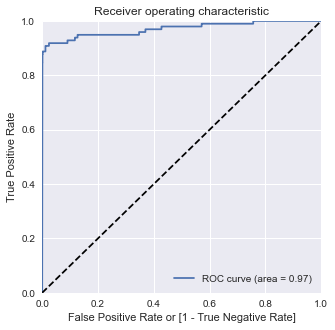

In [30]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Random Forest with SMOTE

In [31]:
rf = RandomForestClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'n_estimators':[200],
    'max_depth':[10],
    'min_samples_leaf':[50, 100],
    'min_samples_split':[25, 50]
}

grid = GridSearchCV(rf,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=cv,
                    verbose=1,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

best_rf = grid.best_estimator_
best_rf.fit(X_smote, y_smote)

y_pred_proba_test = best_rf.predict_proba(X_test)
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['RANDOM FOREST SMOTE', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9767026315419471
BEST GRID PARAMS
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 200}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               56864
Actual Positive                   0                  98


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.9		0.016		0.949		0.924


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               51170                5694
Actual Positive                   5                  93


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.969		0.049		0.918		0.944


		CONFUSION MATRIX
      

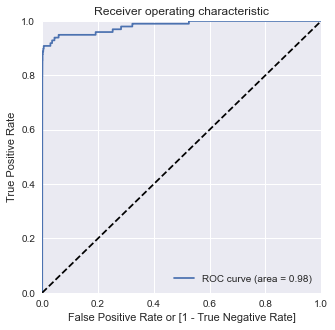

In [32]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Results DataFrame

In [33]:
results.sort_values("recall", ascending=False, inplace=True)
# results.to_csv("results.csv")
results

,model_name,threshold,recall,roc_auc_score
0,LOGISTIC REGRESSION SMOTE,0.7,0.908,0.947
0,RANDOM FOREST SMOTE,0.3,0.908,0.948
0,RANDOM FOREST,0.1,0.867,0.933
0,LOGISTIC REGRESSION IMB,0.1,0.837,0.918


**The best performance was given by Random Forest with SMOTE**.